In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Create Data

In [2]:
data = np.array([[8,12], [12,17],[20,20], [25,10],[22,35],[81,65], [70,75],[55,65],[51,60],[85,93]])

In [3]:
points = range(1, 11)

## The Python `zip` function interleaves lists 

In [4]:
list(zip(points, data[:,0], data[:,1]))

[(1, 8, 12),
 (2, 12, 17),
 (3, 20, 20),
 (4, 25, 10),
 (5, 22, 35),
 (6, 81, 65),
 (7, 70, 75),
 (8, 55, 65),
 (9, 51, 60),
 (10, 85, 93)]

# Data Visualization

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

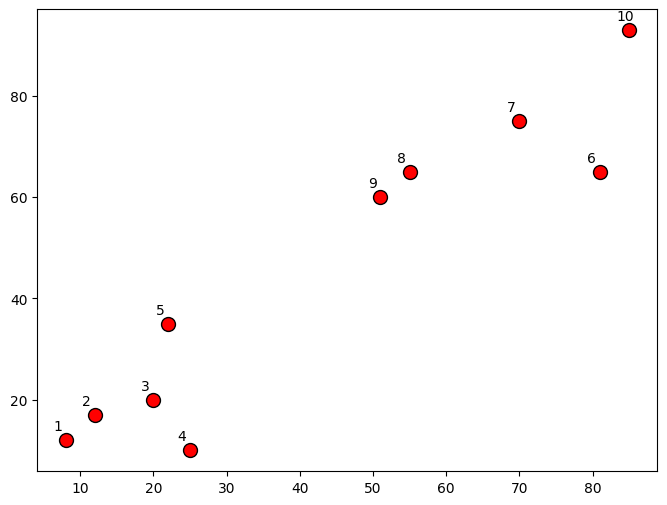

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], color="r", s=100, edgecolor="k")
for point, x, y in zip(points, data[:,0], data[:,1]):
    plt.annotate(point, xy=(x, y), xytext=(-9, 7), textcoords='offset points')
plt.show()

# Partitioning clustering: K-Means

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=21)

In [9]:
kmeans.fit(data)
# only 1 parameter only the features, because its unsupervised

C:\Users\Vic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=21)

In [10]:
centroids = kmeans.cluster_centers_
centroids

array([[17.4       , 18.8       ],
       [78.66666667, 77.66666667],
       [53.        , 62.5       ]])

In [11]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, 0, 0, 1, 1, 2, 2, 1])

## Intertia

Sum of the squared distances of all points to the next centroid

In [12]:
summe_qd = kmeans.inertia_
summe_qd

1137.8333333333333

# Visualization of the cluster assignment and the centroids

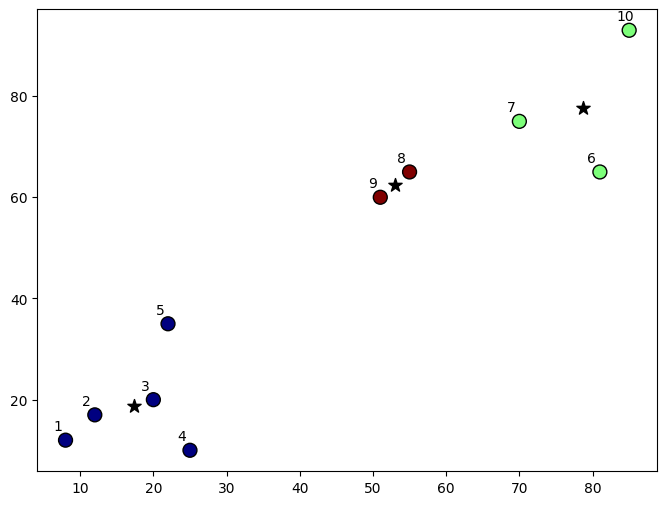

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=clusters, cmap="jet", s=100, edgecolor="k")
for point, x, y in zip(points, data[:,0], data[:,1]):
    plt.annotate(point, xy=(x, y), xytext=(-9, 7), textcoords='offset points')
plt.scatter(centroids[:,0], centroids[:,1], marker="*", color='black', s=100)
plt.show()

# Elbow method for determining the number of clusters

In [14]:
sqds = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state=21)
    kmeans.fit(data)
    sqds.append(kmeans.inertia_)

C:\Users\Vic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

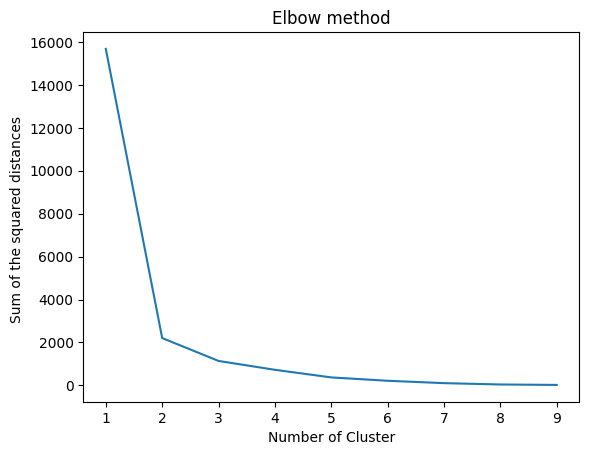

In [15]:
plt.plot(range(1,10), sqds)
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of the squared distances ")
plt.title("Elbow method")
plt.show()

# Hierarchical clustering

## Clustering with the SciPy library

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering

In [17]:
links = linkage(data, 'complete')

### Visualization of the Dendrograms

In [18]:
points = range(1, 11)

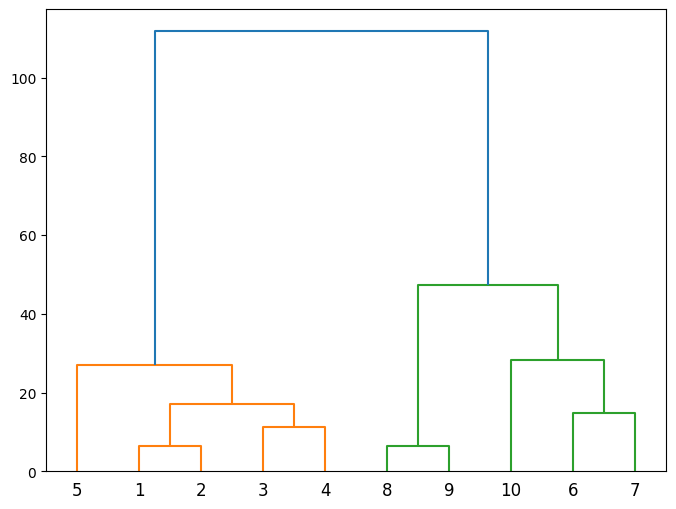

In [19]:
plt.figure(figsize=(8, 6))
dendrogram(links, labels=points)
plt.show()

# Clustering with the scikit-learn library

In [20]:
from sklearn.cluster import AgglomerativeClustering

## Clustering

In [21]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
agglo.fit(data)
clusters = agglo.labels_

In [22]:
clusters

array([1, 1, 1, 1, 1, 0, 0, 2, 2, 0], dtype=int64)

## Visualization

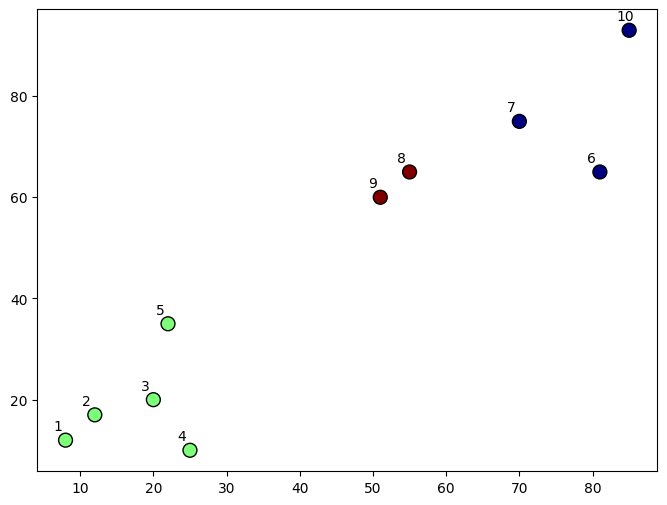

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=clusters, cmap="jet", s=100, edgecolor="k")
for point, x, y in zip(points, data[:,0], data[:,1]):
    plt.annotate(point, xy=(x, y), xytext=(-9, 7), textcoords='offset points')
plt.show()